In [91]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score
from pyod.models.knn import KNN 
from sklearn.model_selection import KFold
import hdbscan
import seaborn as sns

def str_to_numeric(Data):

 label_mapping = {}
 char_cols = Data.dtypes.pipe(lambda x: x[x == 'object']).index
 for c in char_cols:
    Data[c], label_mapping[c] = pd.factorize(Data[c])

 return Data




In [93]:
def str_to_numeric(data):
    data1 = data.copy()
    label_mapping = {}
    char_cols = data1.dtypes.pipe(lambda x: x[x == 'object']).index
    for c in char_cols:
       data1[c], label_mapping[c] = pd.factorize(data1[c])
    return data1

In [94]:
def MLModel(trainX,trainY,testX,clf):
    clf.fit(trainX,trainY)
    return clf.predict(testX)
    

def KFoldValidation(train_X,train_Y,clf,k):
    kf = StratifiedKFold(n_splits=6)
    for train_index, test_index in kf.split(train_X,train_Y):
        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
        y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test) 
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn+fp) 
        print("specificity = ",specificity) 
        print("precision = ",precision_score(y_test, y_pred))
        print("f1 score = ",f1_score(y_test, y_pred)) 
        print("recall = ",recall_score(y_test, y_pred)) 
        print(confusion_matrix(y_test, y_pred))
    
def evaluateTestData(y_test, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn+fp) 
        print("specificity = ",specificity) 
        print("precision = ",precision_score(y_test, y_pred))
        print("f1 score = ",f1_score(y_test, y_pred)) 
        print("recall = ",recall_score(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))

In [95]:
def encode_job(job):
    job_copied = job.copy()
    job_copied[job_copied=='housemaid']=0
    job_copied[job_copied=='services']=1
    job_copied[job_copied=='admin.']=2
    job_copied[job_copied=='blue-collar']=3
    job_copied[job_copied=='technician']=4
    job_copied[job_copied=='retired']=5
    job_copied[job_copied=='management']=6
    job_copied[job_copied=='unemployed']=7
    job_copied[job_copied=='self-employed']=8
    job_copied[job_copied=='entrepreneur']=9
    job_copied[job_copied=='student']=10
    job_copied[job_copied=='unknown']=11
    return job_copied

def encode_marital(marital):
    marital_copied = marital.copy()
    marital_copied[marital_copied=='married']=0
    marital_copied[marital_copied=='single']=1
    marital_copied[marital_copied=='divorced']=2
    marital_copied[marital_copied=='unknown']=3
    return marital_copied

def encode_education(education):
    education_copied = education.copy()
    education_copied[education_copied=='basic.4y']=0
    education_copied[education_copied=='high.school']=1
    education_copied[education_copied=='basic.6y']=2
    education_copied[education_copied=='basic.9y']=3
    education_copied[education_copied=='professional.course']=4
    education_copied[education_copied=='university.degree']=5
    education_copied[education_copied=='illiterate']=6
    education_copied[education_copied=='unknown']=7
    return education_copied

def encode_month(month):
    month_copied = month.copy()
    month_copied[month_copied=='jan']=0
    month_copied[month_copied=='feb']=1
    month_copied[month_copied=='mar']=2
    month_copied[month_copied=='apr']=3
    month_copied[month_copied=='may']=4
    month_copied[month_copied=='jun']=5
    month_copied[month_copied=='jul']=6
    month_copied[month_copied=='aug']=7
    month_copied[month_copied=='sep']=8
    month_copied[month_copied=='oct']=9
    month_copied[month_copied=='nov']=10
    month_copied[month_copied=='dec']=11
    return month_copied

def encode_day_of_week(day_of_week):
    day_of_week_copied = day_of_week.copy()
    day_of_week_copied[day_of_week_copied=='mon']=0
    day_of_week_copied[day_of_week_copied=='tue']=1
    day_of_week_copied[day_of_week_copied=='wed']=2
    day_of_week_copied[day_of_week_copied=='thu']=3
    day_of_week_copied[day_of_week_copied=='fri']=4
    return day_of_week_copied

def encode_poutcome(poutcome):
    poutcome_copied = poutcome.copy()
    poutcome_copied[poutcome_copied=='nonexistent']=0
    poutcome_copied[poutcome_copied=='failure']=1
    poutcome_copied[poutcome_copied=='success']=2
    return poutcome_copied

def encode_contact(contact):
    contact_copied = contact.copy()
    contact_copied[contact_copied=='cellular']=0
    contact_copied[contact_copied=='telephone']=1
    return contact_copied

def encode_binary(binary):
    binary_copied = binary.copy()
    binary_copied[binary_copied=='no']=0
    binary_copied[binary_copied=='yes']=1
    binary_copied[binary_copied=='unknown']=2
    return binary_copied

def encode_binary_rev(binary):
    binary_copied = binary.copy()
    binary_copied[binary_copied=='no']=1
    binary_copied[binary_copied=='yes']=0
    binary_copied[binary_copied=='unknown']=2
    return binary_copied

def normalize(data):
    data1 = data.copy()
    scaler = MinMaxScaler()
    scaler.fit(data1)
    return scaler.transform(data1)

In [96]:
def encode_full_train(df):
    df1 = df.copy()
    df1['job'] = encode_job(df['job']).astype('int64')
    df1['marital'] = encode_marital(df['marital']).astype('int64')
    df1['education'] = encode_education(df['education']).astype('int64')
    df1['loan'] = encode_binary(df['loan']).astype('int64')
    df1['housing'] = encode_binary(df['housing']).astype('int64')
    df1['default'] = encode_binary(df['default']).astype('int64')
    df1['poutcome'] = encode_poutcome(df['poutcome']).astype('int64')
    df1['contact'] = encode_contact(df['contact']).astype('int64')
    df1['month'] = encode_month(df['month']).astype('int64')
    df1['day_of_week'] = encode_day_of_week(df['day_of_week']).astype('int64')
    df1['y'] = encode_binary(df['y']).astype('int64')
    return df1

def encode_full_test(df):
    df1 = df.copy()
    df1['job'] = encode_job(df['job']).astype('int64').astype('int64')
    df1['marital'] = encode_marital(df['marital']).astype('int64')
    df1['education'] = encode_education(df['education']).astype('int64')
    df1['loan'] = encode_binary(df['loan']).astype('int64')
    df1['housing'] = encode_binary(df['housing']).astype('int64')
    df1['default'] = encode_binary(df['default']).astype('int64')
    df1['poutcome'] = encode_poutcome(df['poutcome']).astype('int64')
    df1['contact'] = encode_contact(df['contact']).astype('int64')
    df1['month'] = encode_month(df['month']).astype('int64')
    df1['day_of_week'] = encode_day_of_week(df['day_of_week']).astype('int64')
    return df1

def add_prefix(df):
    df1 = df.copy()
    df1['job'] = 'job_'+ df1['job']
    df1['marital'] = 'marital_'+ df1['marital']
    df1['education'] = 'education_'+ df1['education']
    df1['loan'] = 'loan_'+ df1['loan']
    df1['housing'] = 'housing_'+ df1['housing']
#     df1['default'] = 'default_'+ df1['default']
    df1['poutcome'] = 'poutcome_'+ df1['poutcome']
    df1['contact'] = 'contact_'+ df1['contact']
    df1['month'] = 'month_'+ df1['month']
    df1['day_of_week'] = 'day_of_week_'+ df1['day_of_week']
    return df1

def change_data_type_to_int64(df):
    df1 = df.copy()
    cols = ['job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course',
       'education_university.degree', 'loan_yes',
       'housing_yes', 'poutcome_failure',
       'poutcome_success', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed']
    for c in cols:
        df1[c] = df1[c].astype('int64')
    return df1

In [97]:
def change_dummy_variables(df):
    df1 = df.copy()
    df1 = pd.concat([df1,pd.get_dummies(df['job'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['marital'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['education'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['loan'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['housing'])],axis=1)
#     df1 = pd.concat([df1,pd.get_dummies(df['default'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['poutcome'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['contact'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['month'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['day_of_week'])],axis=1)
#     df1 = pd.concat(df1,pd.get_dummies(df['y']),axis=1)
    df1 = df1.drop(['job','marital','education','loan','housing','default','poutcome','contact','month','day_of_week'],axis=1)
    return df1

def kthdummy(df):
    df1 = df.copy()
    df1 = df1.drop(['job_student','marital_divorced','education_illiterate','loan_no','housing_no','poutcome_nonexistent','month_dec','day_of_week_fri'],axis=1)
    return df1

In [98]:
# pd.get_dummies(unprunedAndImputedData['job'])[0:20]

In [99]:
# label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
#       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
#       'entrepreneur', 'student'],
#      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
#       'professional.course', 'unknown', 'university.degree', 'illiterate'],
#      dtype='object'), 'default': Index(['no', 'unknown', 'yes'], dtype='object'), 'housing': Index(['no', 'yes', 'unknown'], dtype='object'), 'loan': Index(['no', 'yes', 'unknown'], dtype='object')}

In [100]:
unprunedAndImputedData = pd.read_csv('/home/vignesh/Downloads/Unprunued_and_Imputed_Training data.csv')
testData = pd.read_csv('/home/vignesh/Downloads/Final_dataset_test.csv')

In [101]:
unprunedAndImputedData['age'] = normalize(unprunedAndImputedData['age'].values.reshape(-1,1))[:,0]
unprunedAndImputedData['emp.var.rate'] = normalize(unprunedAndImputedData['emp.var.rate'].values.reshape(-1,1))[:,0]
unprunedAndImputedData['cons.price.idx'] = normalize(unprunedAndImputedData['cons.price.idx'].values.reshape(-1,1))[:,0]
unprunedAndImputedData['pdays'] = normalize(unprunedAndImputedData['pdays'].values.reshape(-1,1))[:,0]
unprunedAndImputedData['campaign'] = normalize(unprunedAndImputedData['campaign'].values.reshape(-1,1))[:,0]


testData['age'] = normalize(testData['age'].values.reshape(-1,1))[:,0]
testData['emp.var.rate'] = normalize(testData['emp.var.rate'].values.reshape(-1,1))[:,0]
testData['cons.price.idx'] = normalize(testData['cons.price.idx'].values.reshape(-1,1))[:,0]
testData['pdays'] = normalize(testData['pdays'].values.reshape(-1,1))[:,0]
testData['campaign'] = normalize(testData['campaign'].values.reshape(-1,1))[:,0]

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dty

In [102]:
# unprunedAndImputedDataNumeric = encode_full_train(unprunedAndImputedData)
unprunedAndImputedDataNumeric1 = add_prefix(unprunedAndImputedData)
unprunedAndImputedDataNumeric2 = change_dummy_variables(unprunedAndImputedDataNumeric1)
unprunedAndImputedDataNumeric3 = kthdummy(unprunedAndImputedDataNumeric2)
unprunedAndImputedDataNumeric4 = change_data_type_to_int64(unprunedAndImputedDataNumeric3)

testData1 = add_prefix(testData)
testData2 = change_dummy_variables(testData1)
testData3 = kthdummy(testData2)
testData4 = change_data_type_to_int64(testData3)
testData5 = testData4.drop(testData4.columns[0],axis=1).drop(['id','y'],axis=1)
# prunedDataNumeric = encode_full_train(prunedData)
# prunedDataNumeric1 = change_dummy_variables(prunedDataNumeric)

# testDataNumeric = encode_full_train(testData)

In [82]:
unprunedAndImputedDataNumeric1[0:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,id
0,0.481481,job_housemaid,marital_married,education_basic.4y,no,housing_no,loan_no,contact_telephone,month_may,day_of_week_mon,0.0,1.0,0,poutcome_nonexistent,0.9375,0.698753,-36.4,4.857,no,0
1,0.493827,job_services,marital_married,education_high.school,no,housing_no,loan_no,contact_telephone,month_may,day_of_week_mon,0.0,1.0,0,poutcome_nonexistent,0.9375,0.698753,-36.4,4.857,no,1
2,0.246914,job_services,marital_married,education_high.school,no,housing_yes,loan_no,contact_telephone,month_may,day_of_week_mon,0.0,1.0,0,poutcome_nonexistent,0.9375,0.698753,-36.4,4.857,no,2
3,0.283951,job_admin,marital_married,education_basic.6y,no,housing_no,loan_no,contact_telephone,month_may,day_of_week_mon,0.0,1.0,0,poutcome_nonexistent,0.9375,0.698753,-36.4,4.857,no,3
4,0.481481,job_services,marital_married,education_high.school,no,housing_no,loan_yes,contact_telephone,month_may,day_of_week_mon,0.0,1.0,0,poutcome_nonexistent,0.9375,0.698753,-36.4,4.857,no,4
5,0.345679,job_services,marital_married,education_basic.9y,no,housing_no,loan_no,contact_telephone,month_may,day_of_week_mon,0.0,1.0,0,poutcome_nonexistent,0.9375,0.698753,-36.4,4.857,no,5
6,0.518519,job_admin,marital_married,education_professional.course,no,housing_no,loan_no,contact_telephone,month_may,day_of_week_mon,0.0,1.0,0,poutcome_nonexistent,0.9375,0.698753,-36.4,4.857,no,6
7,0.296296,job_blue-collar,marital_married,education_basic.6y,no,housing_no,loan_no,contact_telephone,month_may,day_of_week_mon,0.0,1.0,0,poutcome_nonexistent,0.9375,0.698753,-36.4,4.857,no,7
8,0.086420,job_technician,marital_single,education_professional.course,no,housing_yes,loan_no,contact_telephone,month_may,day_of_week_mon,0.0,1.0,0,poutcome_nonexistent,0.9375,0.698753,-36.4,4.857,no,8
9,0.098765,job_services,marital_single,education_high.school,no,housing_yes,loan_no,contact_telephone,month_may,day_of_week_mon,0.0,1.0,0,poutcome_nonexistent,0.9375,0.698753,-36.4,4.857,no,9


In [103]:
unPruned_train_X = unprunedAndImputedDataNumeric4.drop(['id','y'],axis=1)
unPruned_train_Y = encode_binary(unprunedAndImputedDataNumeric4[['y']]).astype('int64')

In [104]:
unPruned_train_X = unPruned_train_X.drop(['loan_yes'],axis=1)
testData5 = testData5.drop(['loan_yes'],axis=1)

In [120]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.001, class_weight={1: 0.9, 0: 0.1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [121]:
KFoldValidation(unPruned_train_X,unPruned_train_Y,clf,10)

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

specificity =  1.0
precision =  0.0
f1 score =  0.0
recall =  0.0
[[5002    0]
 [ 640    0]]
specificity =  1.0
precision =  1.0
f1 score =  0.47072879330943845
recall =  0.3078125
[[5002    0]
 [ 443  197]]
specificity =  0.9416233506597361
precision =  0.6843243243243243
f1 score =  0.8089456869009585
recall =  0.9890625
[[4710  292]
 [   7  633]]
specificity =  0.8588564574170332
precision =  0.475482912332838
f1 score =  0.6445115810674722
recall =  1.0
[[4296  706]
 [   0  640]]
specificity =  0.1873625274945011
precision =  0.1360544217687075
f1 score =  0.23952095808383236
recall =  1.0
[[ 937 4064]
 [   0  640]]


/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


specificity =  0.0
precision =  0.11329787234042553
f1 score =  0.20353559483994269
recall =  1.0
[[   0 5001]
 [   0  639]]


In [122]:
predictedData1 = MLModel(unPruned_train_X,unPruned_train_Y,testData5,clf)

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [123]:
evaluateTestData(encode_binary(testData4['y']).astype('int64'),predictedData1)

specificity =  0.7828360504460166
precision =  0.29364682341170584
f1 score =  0.41396332863187585
recall =  0.7013142174432497
[[5090 1412]
 [ 250  587]]


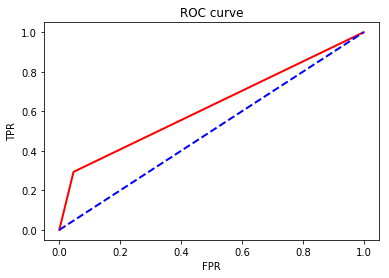

0.6234151720054784

In [109]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

##Computing false and true positive rates
fpr, tpr,_=roc_curve(predictedData1,encode_binary(testData4['y']).astype('int64'),drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
auc(fpr, tpr)

In [45]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
CValue = [0.001,0.003,0.005,0.008,0.01,0.03,0.05,0.08,0.1,0.3,0.5,0.8,1]
# maxiterations = [100,200,300,400,500,600,700]
class_weights = [{1:0.5,0:0.5},{1: 0.6, 0: 0.4},{1: 0.7, 0: 0.3},{1: 0.8, 0: 0.2},{1: 0.9, 0: 0.1}]
# logisticDict = dict(C=CValue,max_iter=maxiterations,class_weight=class_weights)
logisticDict = dict(C=CValue,class_weight=class_weights)

# logisticDict = dict(maxiter=maxiterations)
# grid = GridSearchCV(clf, logisticDict, cv=6, scoring='precision')

def TuneHyperParameters(dictionary,clf,cv,scoring,trainX,trainY,plt):
    grid = GridSearchCV(clf, logisticDict, cv=cv, scoring=scoring)
    grid.fit(trainX,trainY)
    testrange = range(1,len(grid.error_score)+1)
#     grid_validation = [x.mean_validation_score for x in grid.grid_scores_]
#     plt.plot(testrange,grid_validation)
#     for x in grid.error_score:
#         print(x)
    print(grid.cv_results_)
    print(grid.best_estimator_)
    return grid

grid_ = TuneHyperParameters(logisticDict,clf,10,'recall',unPruned_train_X,unPruned_train_Y,plt)

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

{'mean_fit_time': array([0.09166189, 0.08896999, 0.09889499, 0.16310163, 0.13685485,
       0.19145656, 0.1125801 , 0.11670593, 0.13735509, 0.16259642,
       0.20445514, 0.12506557, 0.11470115, 0.10605927, 0.15518224,
       0.21699854, 0.16400051, 0.13488042, 0.20382512, 0.17301281,
       0.15324422, 0.15159309, 0.21955411, 0.21267366, 0.18061455,
       0.26922286, 0.13725448, 0.23674635, 0.24785431, 0.231125  ,
       0.26306732, 0.25635072, 0.25880663, 0.26715147, 0.2360177 ,
       0.29254619, 0.15977935, 0.28049064, 0.27283907, 0.26771021,
       0.2986085 , 0.18065429, 0.27336458, 0.2922972 , 0.27943675,
       0.35471221, 0.32973798, 0.22034041, 0.35103901, 0.33653728,
       0.36442093, 0.36469901, 0.24179399, 0.36823726, 0.39387898,
       0.30805413, 0.33396212, 0.39984488, 0.42320565, 0.43089163,
       0.27402969, 0.3958567 , 0.37045952, 0.31168266, 0.4596705 ]), 'std_fit_time': array([0.00446151, 0.00267568, 0.01015673, 0.02984652, 0.01074976,
       0.01988975, 0.00563

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
